In [1]:
# First import pandas and read in your dataset as a csv file
import pandas as pd

churn_df = pd.read_csv('churn_raw_data.csv', index_col='CaseOrder', na_values = 'Nan')

In [2]:
# Use the info method to determine the datatypes of your variables

print(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education             10

In [3]:
# Lets import the rest of the libraries and functions that we will need
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Lets also set it so that we are able to see all the columns and rows in the tables.
# To set max columns:
pd.set_option('display.max_columns', None)

In [5]:
# Lets take a look at the head of the dataframe to get a feel for it
churn_df.head(10)

,Unnamed: 0,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,America/New_York,Chief Technology Officer,3.0,83.0,No Schooling Completed,Full Time,NaN,Never Married,Female,No,7.814859,15,3,1,No,One year,Yes,No,NaN,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3
7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,America/New_York,"Surveyor, hydrographic",0.0,NaN,Associate's Degree,Full Time,11467.50,Widowed,Male,Yes,11.129094,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972,6,5,6,4,1,5,5,5
8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,America/Chicago,Sales promotion account executive,2.0,NaN,Bachelor's Degree,Full Time,26759.64,Married,Female,Yes,7.594838,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,NaN,114.754111,979.612708,2,2,2,5,2,3,4,5
9,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,Suburban,America/New_York,Teaching laboratory technician,2.0,49.0,"Some College, Less than 1 Year",Full Time,58634.51,Separated,Prefer not to answer,No,6.637259,20,2,3,NaN,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,118.366844,1312.874964,5,4,4,3,4,3,4,4


In [6]:
#Immediately I can see that the unamed column is a duplicate of the CaseOrder column.
#Let's drop that one:
churn_df.drop(columns='Unnamed: 0')

,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3.0,NaN,"Some College, Less than 1 Year",Retired,55723.74,Married,Male,No,9.265392,12,2,0,NaN,Month-to-month,Yes,Yes,DSL,NaN,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.828800,6511.253000,3,2,3,3,4,3,2,3
9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4.0,48.0,Regular High School Diploma,Part Time,NaN,Divorced,Male,No,8.115849,15,2,0,NaN,Two Year,No,No,Fiber Optic,NaN,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,208.856400,5695.952000,4,5,5,4,4,5,2,5
9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,NaN,NaN,Nursery School to 8th Grade,Full Time,NaN,Never Married,Female,No,4.837696,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),NaN,168.220900,4159.306000,4,4,4,4,4,4,4,5


In [7]:
#I also noticed that there were columns labeled item1 - item8, pretty ambiguous.
#After looking at the dictionary for this dataset, I figured it was useful to changethose names to something more recognizeable.

#First we create a dictionary matching the columns to their proper names:
customer_survey = {'item1':'Quick_Responses', 'item2':'Quick_Solutions', 'item3':'Quick_Replacements', 
                   'item4':'Reliability', 'item5':'Enough_Options', 'item6':'Respectfulness', 
                   'item7':'Politeness', 'item8':'Active_Listening'}

#Now we can rename the columns using this dictionary that we just made.
churn_df = churn_df.rename(columns=customer_survey)

In [8]:
#Lets take another look at the dataframe now.
churn_df.head(10)

,Unnamed: 0,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Quick_Responses,Quick_Solutions,Quick_Replacements,Reliability,Enough_Options,Respectfulness,Politeness,Active_Listening
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,America/New_York,Chief Technology Officer,3.0,83.0,No Schooling Completed,Full Time,NaN,Never Married,Female,No,7.814859,15,3,1,No,One year,Yes,No,NaN,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,Electronic Check,7.000994,184.401558,1039.357983,3,3,3,2,4,3,3,3
7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,America/New_York,"Surveyor, hydrographic",0.0,NaN,Associate's Degree,Full Time,11467.50,Widowed,Male,Yes,11.129094,10,0,1,Yes,Month-to-month,No,No,DSL,Yes,No,No,No,No,Yes,Yes,Yes,No,Electronic Check,13.236774,200.064886,1907.242972,6,5,6,4,1,5,5,5
8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,America/Chicago,Sales promotion account executive,2.0,NaN,Bachelor's Degree,Full Time,26759.64,Married,Female,Yes,7.594838,16,0,0,Yes,Month-to-month,No,No,DSL,No,No,No,Yes,No,No,No,No,Yes,Mailed Check,NaN,114.754111,979.612708,2,2,2,5,2,3,4,5
9,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,Suburban,America/New_York,Teaching laboratory technician,2.0,49.0,"Some College, Less than 1 Year",Full Time,58634.51,Separated,Prefer not to answer,No,6.637259,20,2,3,NaN,Month-to-month,Yes,No,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),8.220686,118.366844,1312.874964,5,4,4,3,4,3,4,4


In [9]:
#Next we will check for any more duplicate values. This is one of the best practice steps we should always do.
churn_df.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [10]:
#The results show that there are no duplicated values. 
#Now lets look and see about handling these null values. We do this series of steps to get a percentage of missing values. 

# 1) Get the number of missing values using the .isnull and .sum() methods
missing_values = churn_df.isnull().sum()

# 2) Get the total number of values
total_values = churn_df.count() + missing_values

# 3) Calculate the percentage of missing values
percentage_missing = (missing_values/total_values) * 100

# 4) Print and see
print(percentage_missing)

Unnamed: 0               0.00
Customer_id              0.00
Interaction              0.00
City                     0.00
State                    0.00
County                   0.00
Zip                      0.00
Lat                      0.00
Lng                      0.00
Population               0.00
Area                     0.00
Timezone                 0.00
Job                      0.00
Children                24.95
Age                     24.75
Education                0.00
Employment               0.00
Income                  24.90
Marital                  0.00
Gender                   0.00
Churn                    0.00
Outage_sec_perweek       0.00
Email                    0.00
Contacts                 0.00
Yearly_equip_failure     0.00
Techie                  24.77
Contract                 0.00
Port_modem               0.00
Tablet                   0.00
InternetService         21.29
Phone                   10.26
Multiple                 0.00
OnlineSecurity           0.00
OnlineBack

In [11]:
#From this we can see that the columns missing data are:
    #'Children', 'Age', 'Income', 'Techie', 'Internet Service', 
    #'Phone', 'TechSupport', 'Tenure', 'Bandwidth_GB_Year'

#These percentages are too big to just drop the columns so we will do some imputation to handle them.
#I will begin with the numerical columns:

#'Children'
churn_df['Children'].mean()  #Mean = 1.8225 so 2

churn_df['Children'] = churn_df['Children'].fillna(2)

In [12]:
#'Age' 
churn_df['Age'].mean() #Mean = 53.27574750830565 so 53

churn_df['Age'] = churn_df['Age'].fillna(53)

In [13]:
#'Income' 
churn_df['Income'].mean() #Mean = 39936.76222636485 so $39,937

churn_df['Income'] = churn_df['Income'].fillna(39937)

In [14]:
#'Tenure'
churn_df['Tenure'].mean()  #Mean = 34.49885764604521 so 34.498858 since the filled in values end at the 6th decimal

churn_df['Tenure'] = churn_df['Tenure'].fillna(34.498858)

In [15]:
#'Bandwidth_GB_Year'
churn_df['Bandwidth_GB_Year'].mean() #Mean = 3398.842752015135 so 3398.842752

churn_df['Bandwidth_GB_Year'] = churn_df['Bandwidth_GB_Year'].fillna(3398.842752)

In [16]:
#Now with the numerical columns out of the way, lets look at these categorical columns.

#'Techie', 'InternetService', 'Phone', 'TechSupport'
Techie_mode = churn_df['Techie'].mode()[0]
churn_df['Techie'] = churn_df['Techie'].fillna(Techie_mode)

InternetService_mode = churn_df['InternetService'].mode()[0]
churn_df['InternetService'] = churn_df['InternetService'].fillna(InternetService_mode)

Phone_mode = churn_df['Phone'].mode()[0]
churn_df['Phone'] = churn_df['Phone'].fillna(Phone_mode)

TechSupport_mode = churn_df['TechSupport'].mode()[0]
churn_df['TechSupport'] = churn_df['TechSupport'].fillna(TechSupport_mode)

In [17]:
#Lets save the newly cleaned dataset now.
churn_df.to_csv("cleaned_churn.csv")

In [18]:
#Read it back in to make sure that your changes were saved
cleaned_churn = pd.read_csv("cleaned_churn.csv", index_col='CaseOrder')

In [19]:
#Check and make sure all your missing values were handled as well
cleaned_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  float64
 14  Age                   10000 non-null  float64
 15  Education             10

In [20]:
#Okay, we are getting into principal component analysis. First lets pull out all the numerical columns.
churn_numeric = cleaned_churn[['Population','Children', 'Income', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

churn_numeric.head()

,Population,Children,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,
1,38,2.0,28561.99,6.972566,0,1,6.795513,171.449762,904.536110
2,10446,1.0,21704.77,12.014541,0,1,1.156681,242.948015,800.982766
3,3735,4.0,39937.00,10.245616,0,1,15.754144,159.440398,2054.706961
4,13863,1.0,18925.23,15.206193,2,0,17.087227,120.249493,2164.579412
5,11352,0.0,40074.19,8.960316,2,1,1.670972,150.761216,271.493436


In [21]:
# Install the necessary packages needed for PCA.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [22]:
# With these downloaded now lets normalize our data:
# Subtract the mean of the numeric data from the total then divide that by the standard deviation
normalized_churn_numeric=(churn_numeric-churn_numeric.mean())/churn_numeric.std()

In [23]:
# Now lets convert that normalized data into a dataframe:

#1 First we shape our data. This lets us know how many principal components are going to be created.
pca = PCA(n_components = churn_numeric.shape[1])

In [24]:
#2 Next we will fit the pca to the normalized dataset that we created.
pca.fit(normalized_churn_numeric)

PCA(n_components=9)

In [26]:
#3 Lastly we are going to take our normalized dataframe that has been applied to the PCA and create a new dataframe from it
churn_numeric_pca = pd.DataFrame(pca.transform(normalized_churn_numeric), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

In [27]:
#Print the newly above data and now you see the loadings.
churn_numeric_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.636497,-0.313971,0.962067,-0.940642,-0.524458,-0.119128,-0.699099,-0.525357,-0.070434
1,-1.739733,1.323177,0.194745,-1.351904,0.018795,-0.003945,-0.812234,-1.159041,-0.016466
2,-0.992930,-0.233005,1.712278,-0.518090,-0.017056,0.132126,-0.045812,-0.047259,0.062045
3,-0.962861,-0.496681,-1.300303,-0.257400,-0.363967,-0.025665,0.522701,1.368928,0.136048
4,-1.998806,-0.468155,-0.876836,-0.162354,-0.848509,1.265701,-0.473702,0.023259,-0.102668
...,...,...,...,...,...,...,...,...,...
9995,1.981988,-0.549500,-0.060307,1.281095,-0.568756,-0.140297,0.703622,0.092570,0.122674
9996,1.548356,-0.181490,-1.734239,-0.339276,3.699283,1.678890,2.177025,-0.849650,-0.025077
9997,0.217262,-0.764298,0.451346,0.046405,0.025393,-1.186964,-0.531619,-0.510922,0.271116
9998,2.141952,1.088122,-1.577594,-0.957556,1.396370,-0.200252,0.388782,-1.046821,-0.054387


In [31]:
#What the PCA loadings do is tell what variables contribute the most.
#PCA loadings closer to 1 or -1 tell that the variable is significantly associated with the Principla component in question
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'], 
                        index = churn_numeric.columns) 

In [32]:
# Now run the loadings matrix that you just created. You can see the variables on the left.
# We can see what variables contribute the most to each PC now by seeing which loadings are the highest or closest to one
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Population,0.000105,-0.061310,-0.336597,-0.216392,0.806734,0.402158,0.153115,-0.011097,-0.000741
Children,-0.000079,-0.010028,0.652276,0.088539,0.170991,-0.030176,0.731870,-0.019349,-0.020985
Income,0.005542,-0.000343,0.222448,0.829341,0.229330,0.300697,-0.341238,-0.056775,0.001222
Outage_sec_perweek,0.022521,0.705327,0.026126,0.005922,0.050012,0.053659,-0.005187,0.704188,0.000071
Contacts,0.004839,0.001517,-0.507310,0.325173,-0.430236,0.412065,0.530717,0.017478,-0.002618
Yearly_equip_failure,0.015661,0.064063,0.383534,-0.389385,-0.278058,0.752381,-0.200949,-0.114686,-0.002296
Tenure,0.705242,-0.058350,-0.007402,-0.001346,-0.001957,-0.007382,-0.013062,0.036853,-0.705397
MonthlyCharge,0.045636,0.700731,-0.080806,0.011567,0.049062,-0.089565,0.045274,-0.696744,-0.047950
Bandwidth_GB_Year,0.706926,-0.010914,0.005123,0.000348,0.004398,-0.010472,0.013826,-0.011354,0.706867


In [33]:
# The last step of this PCA analysis is to select our PC's. 
# We have to select the ones that are most meaningful to keep. 
# To do this we use the Kaiser Rule. This rule recommends keeping PCs with eigenvalues greater than or equal to 1
# The eigenvalues represent the strength of the PC, we can see these using a scree plot.

#1 We need the covariance and vectors to define the eigenvalues before creating the scree plot. For the covariance matrix:
cov_matrix = np.dot(normalized_churn_numeric.T, normalized_churn_numeric)/churn_numeric.shape[0]

In [34]:
#2 Next we do the vectors/eigenvectors that will give rise to the defined eigenvalues
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

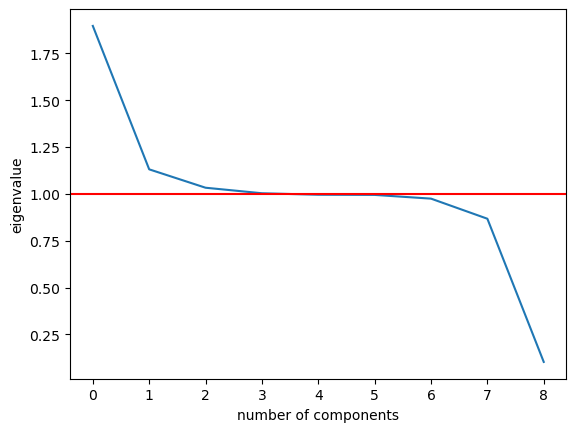

In [35]:
#3 Now that we have those, we can create the scree plot
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalue')
plt.axhline(y=1, color="red")
plt.show()

In [ ]:
# From this scree plot we can see that we would need to keep PC1, PC2, and PC3.